In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train), (x_test,y_test)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 6s 0us/step


In [6]:
x_train=pad_sequences(x_train, maxlen=200)
x_test=pad_sequences(x_test, maxlen=200)

In [7]:
model=Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,
                 epochs=10,
                 batch_size=512,
                 validation_split=0.2,
                 verbose=1)

Epoch 1/10
40/40 [==============================] - 2s 30ms/step - loss: 0.6890 - accuracy: 0.6410 - val_loss: 0.6809 - val_accuracy: 0.6824
Epoch 2/10
40/40 [==============================] - 1s 25ms/step - loss: 0.6676 - accuracy: 0.7434 - val_loss: 0.6472 - val_accuracy: 0.7704
Epoch 3/10
40/40 [==============================] - 1s 23ms/step - loss: 0.6207 - accuracy: 0.7918 - val_loss: 0.5888 - val_accuracy: 0.8028
Epoch 4/10
40/40 [==============================] - 1s 30ms/step - loss: 0.5497 - accuracy: 0.8288 - val_loss: 0.5163 - val_accuracy: 0.8256
Epoch 5/10
40/40 [==============================] - 1s 23ms/step - loss: 0.4722 - accuracy: 0.8534 - val_loss: 0.4511 - val_accuracy: 0.8438
Epoch 6/10
40/40 [==============================] - 1s 24ms/step - loss: 0.4043 - accuracy: 0.8719 - val_loss: 0.4018 - val_accuracy: 0.8526
Epoch 7/10
40/40 [==============================] - 1s 24ms/step - loss: 0.3531 - accuracy: 0.8827 - val_loss: 0.3660 - val_accuracy: 0.8654
Epoch 8/10
40

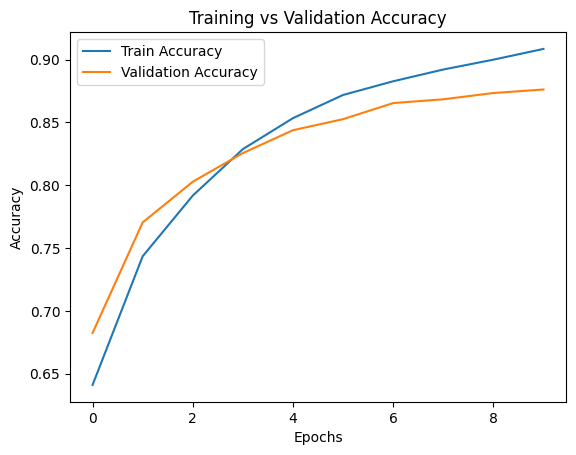

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 996us/step - loss: 0.3207 - accuracy: 0.8702


In [13]:
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Test Loss: 0.3207053244113922
Test Accuracy: 0.870199978351593
